In [2]:
import hangul_font
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl
import os
import time
import math
import webbrowser
import numpy as np
import re
import sys

df = pd.read_csv('data_visual.txt2023-1-7-8해시태그 by 스타일.csv',encoding='cp949')
df.drop('Unnamed: 0',axis='columns',inplace =True)
df.rename(columns = {'cordi':'코디','0':'날짜','1':'조회수','2':'댓글'},inplace=True)
df.drop(columns=['댓글'], inplace=True)
df

filter_daendi = (df['코디'] == '댄디')
filter_casual =(df['코디'] == '캐주얼')
filter_street = (df['코디'] == '스트릿')
filter_formal = (df['코디'] == '포멀')
filter_sports = (df['코디'] == '스포츠')
filter_americancasual = (df['코디'] == '아메리칸 캐주얼')


df_street = df[filter_street]
df_street_hashtag = pd.DataFrame(df_street)
df_street_hashtag.drop(columns = ['날짜','조회수'],inplace=True)
df_street_hashtag


n = time.localtime()
s = f'{n.tm_year}-{n.tm_mon}-{n.tm_mday}-{n.tm_sec}'
f_dir = "c:\\temp\\"+s+'.txt'
fc_name = f_dir+'street'+'.csv'

df_street_hashtag.to_csv(fc_name,index ='코디',encoding='cp949')

In [5]:
import csv
csv_list = []
with open('2023-1-8-10.txtstreet.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    csv_list = list(reader)
    del csv_list[0]


list2 = np.concatenate(csv_list).tolist()
street_hashlist = [item for item in list2 if item != ''  ]

from collections import Counter


#1~100위 스타일 분포
street_cate=np.array(list(set(street_hashlist)))
array_style = np.array(street_hashlist)
streethash_dict=Counter(array_style)
list_key=[]
list_value = []
for key,value in streethash_dict.items():
    list_key.append(key)
    list_value.append(value)

n = time.localtime()
s = f'{n.tm_year}-{n.tm_mon}-{n.tm_mday}-{n.tm_sec}'
f_dir = "c:\\temp\\" +s+".txt"
fc_name = f_dir+s+' streethash.csv'

df_formalhash= pd.DataFrame(list_value,index=list_key,columns=['개수'])
ref_formal_df=df_formalhash['개수'].sort_values(ascending =False)
ref_formal_df.to_csv(fc_name,encoding='cp949') 

In [9]:
df=pd.read_csv('2023-1-8-2.txt2023-1-8-2 streethash.csv',encoding='cp949',index_col=0)
sports_fit_df=df.loc[['테이퍼드핏','와이드핏','오버핏','드로우핏','벌룬핏']]
sports_products_df = df.loc[['트레이닝조거 팬츠','캡야구 모자','캔버스단화','맨투맨스웨트셔츠','반소매 티셔츠']]
sports_fit_df.sort_values('개수',ascending=False,inplace=True)
sports_products_df.sort_values('개수',ascending=True,inplace=True)

Text(0.5, 0, '해시태그 개수')

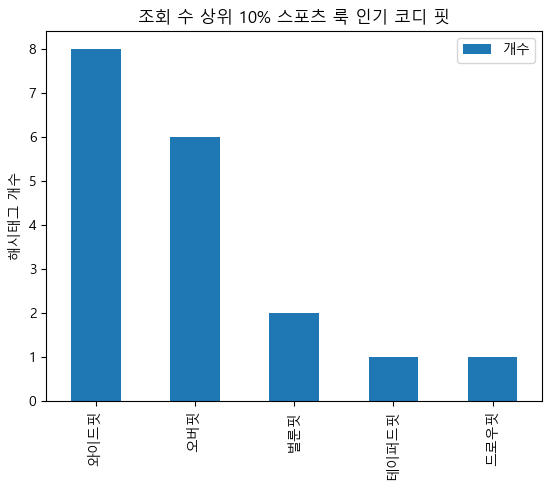

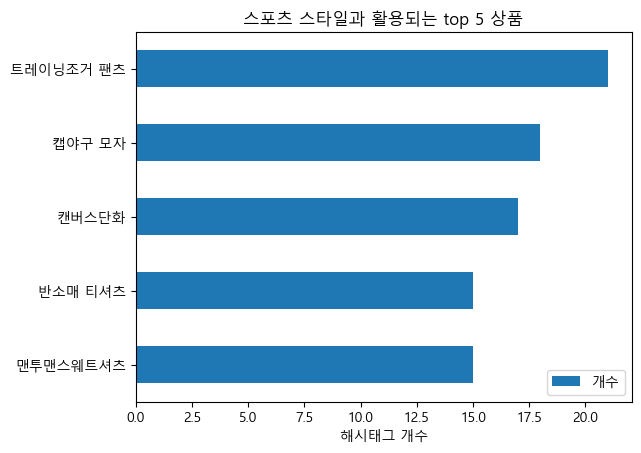

In [10]:
sports_fit_df.plot(kind='bar')
plt.title('조회 수 상위 10% 스포츠 룩 인기 코디 핏')
plt.ylabel('해시태그 개수')

sports_products_df.plot(kind = 'barh')
plt.title('스포츠 스타일과 활용되는 top 5 상품')
plt.xlabel('해시태그 개수')